# Apply affine transformations to images: some examples

In [1]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import torch
import torchaffine

In [2]:
# make white square
n = 20
B = 1
x = torch.zeros(B, 3, n, n)
x[:, :, n//5:-n//5, n//5:-n//5] = 1

### Translation

/home/lpetrini/anaconda3/envs/env-clone/lib/python3.8/site-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1634272128894/work/aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


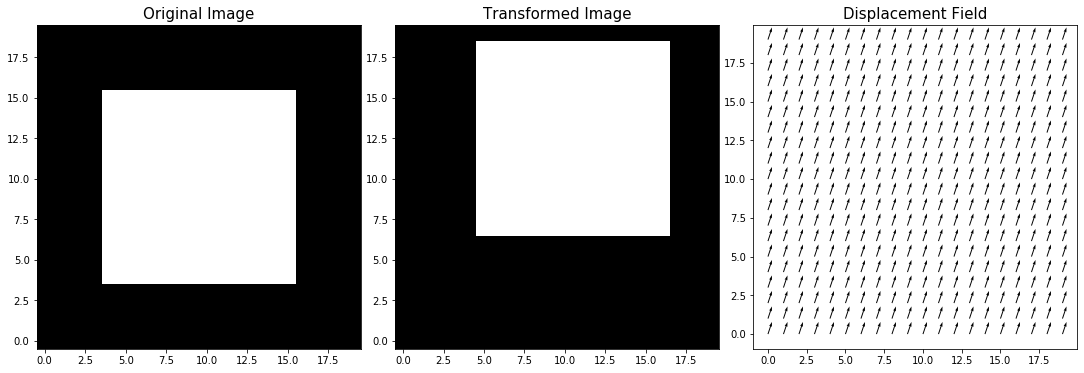

In [3]:
# translation magnitude
tx, ty = 1., 3

_, ax = plt.subplots(1, 3, figsize=(15, 6))
plt.sca(ax[0])
plt.title(r'Original Image', fontsize=15)
plt.imshow(x[0].permute(1, 2, 0), origin='lower')
plt.tight_layout(0)

plt.sca(ax[1])
plt.title(r'Transformed Image', fontsize=15)
plt.imshow(torchaffine.transform(x, translation_x=tx, translation_y=ty)[0].permute(1, 2, 0), origin='lower')
plt.tight_layout(0)

plt.sca(ax[2])
plt.title(r'Displacement Field', fontsize=15)
t = torch.tensor([tx, ty])
X = torch.stack(torch.meshgrid(torch.arange(0, n), torch.arange(0, n))).float().flip(0)
tau = torchaffine.displacement_field(n, translation=t)
plt.quiver(X[0], X[1].flip(1), *tau[0], scale=80)
plt.axis('square')
plt.tight_layout(0.5)

### Rotation

In [4]:
n

20

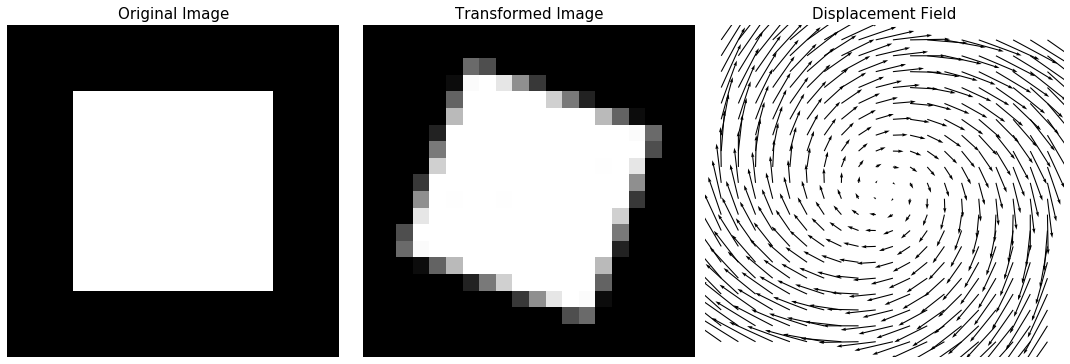

In [5]:
# rotation angle
theta = 20

cx, cy = (n-1)/2, (n-1)/2

_, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.sca(ax[0])
plt.title(r'Original Image', fontsize=15)
plt.imshow(x[0].permute(1, 2, 0), origin='lower')
plt.axis('off')
plt.tight_layout(0)

plt.sca(ax[1])
plt.title(r'Transformed Image', fontsize=15)
plt.imshow(torchaffine.transform(x, rotation=theta, center_x=cx, center_y=cy)[0].permute(1, 2, 0), origin='lower')
plt.axis('off')
plt.tight_layout(0)

plt.sca(ax[2])
plt.title(r'Displacement Field', fontsize=15)
M = torchaffine.rotation_matrix(theta)
tau = torchaffine.displacement_field(n, M, center=torch.tensor([cx, cy]))
plt.quiver(*tau[0], scale=30)
plt.axis('off')
plt.tight_layout(0.5)

### Compression

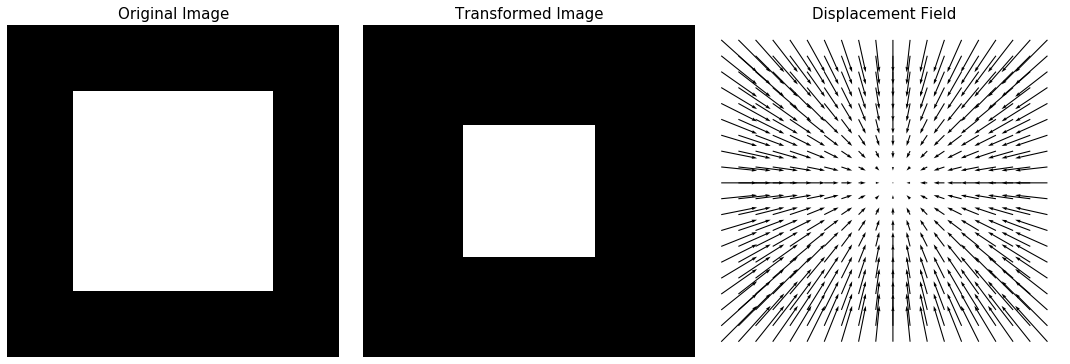

In [6]:
# compression factor
s = -.5

_, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.sca(ax[0])
plt.title(r'Original Image', fontsize=15)
plt.imshow(x[0].permute(1, 2, 0), origin='lower')
plt.axis('off')
plt.tight_layout(0)

plt.sca(ax[1])
plt.title(r'Transformed Image', fontsize=15)
plt.imshow(torchaffine.transform(x, compression=s, center_x=n/2, center_y=n/2)[0].permute(1, 2, 0), origin='lower')
plt.axis('off')
plt.tight_layout(0)

plt.sca(ax[2])
plt.title(r'Displacement Field', fontsize=15)
M = torchaffine.compression_matrix(s)
tau = torchaffine.displacement_field(n, M, center=torch.tensor([n/2, n/2]))
plt.quiver(*tau[0], scale=50)
plt.axis('off')
plt.tight_layout(0.5)

### Shear

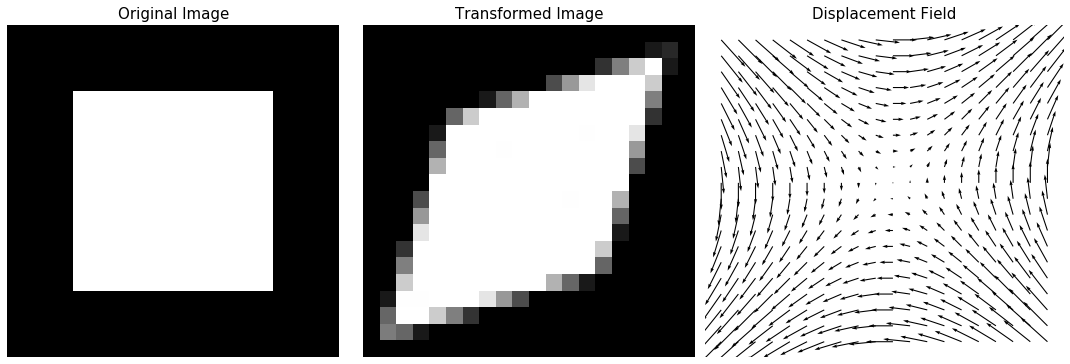

In [7]:
# Shear parameters
a, b = 0, 0.3

_, ax = plt.subplots(1, 3, figsize=(15, 5))
plt.sca(ax[0])
plt.title(r'Original Image', fontsize=15)
plt.imshow(x[0].permute(1, 2, 0), origin='lower')
plt.axis('off')
plt.tight_layout(0)

plt.sca(ax[1])
plt.title(r'Transformed Image', fontsize=15)
plt.imshow(torchaffine.transform(x, shear_a=a, shear_b=b, center_x=n/2, center_y=n/2)[0].permute(1, 2, 0), origin='lower')
plt.axis('off')
plt.tight_layout(0)

plt.sca(ax[2])
plt.title(r'Displacement Field', fontsize=15)
M = torchaffine.pure_shear_matrix(a=a, b=b)
tau = torchaffine.displacement_field(n, M, center=torch.tensor([n/2, n/2]))
plt.quiver(X[0], X[1], *tau[0], scale=40)
plt.axis('off')
plt.tight_layout(0.5)